# Adversarial Patch Ergebnisse anzeigen

Dieses Notebook lädt `adversarial_patch_adv.pt` und zeigt die adversarialen Bilder an.

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [23]:
data = torch.load('adversarial_patch_adv.pt', map_location='cpu')
x_adv = data['x_adv']
x_orig = data['x_orig']
y = data['y']
print('x_adv:', x_adv.shape)
print('x_orig:', x_orig.shape)
print('y:', y.shape)


x_adv: torch.Size([16, 3, 64, 64])
x_orig: torch.Size([16, 3, 64, 64])
y: torch.Size([16])


In [24]:
def to_img(t):
    if torch.is_tensor(t):
        t = t.detach().cpu().numpy()
    if t.ndim == 3:
        t = np.transpose(t, (1, 2, 0))
    t = np.clip(t, 0.0, 1.0)
    return t


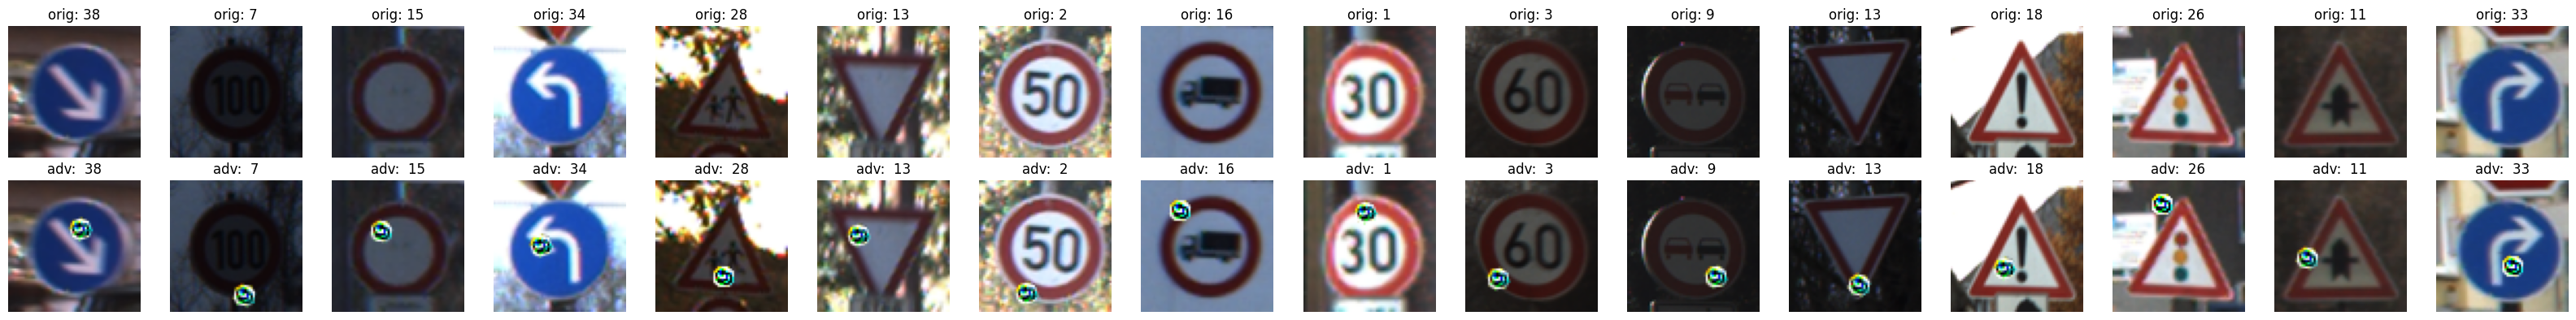

In [25]:
n = len(x_adv)
fig, axes = plt.subplots(2, n, figsize=(2*n, 4))
if n == 1:
    axes = np.array([[axes[0]], [axes[1]]])
for i in range(n):
    axes[0, i].imshow(to_img(x_orig[i]))
    axes[0, i].set_title(f'orig: {int(y[i])}')
    axes[0, i].axis('off')

    axes[1, i].imshow(to_img(x_adv[i]))
    axes[1, i].set_title(f'adv:  {int(y[i])}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [27]:
accs = data["acc_list"]
accs

[93.75, 93.75, 81.25, 87.5, 75.0]